In [128]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sl_ai.utils import clean_listdir

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [129]:
# dataset = Path('gestures_dataset_new.csv')
# DATASET_CSV = Path('../gestures_dataset.csv')
DATASET_ROOT = Path('../ai_data/vgt-all')

# UPLOADED_DATASET_CSV = Path('../uploaded_gestures_dataset.csv')
UPLOADED_GESTURES_ROOT = Path('../ai_data/vgt-uploaded')

In [130]:
def handedness_data_from_directory_names(dataset_location: Path):
    handedness_data = {}
    for gesture_folder in clean_listdir(dataset_location):
        *gestures_name_parts, handedness_string = gesture_folder.split("_")
        gesture_name = "_".join(gestures_name_parts)
        handedness_data[gesture_name] = (
            handedness_string[0] == "1",
            handedness_string[1] == "1",
        )
    return handedness_data

In [131]:
%load_ext autoreload
%autoreload 2
from sl_ai.dataset import GestureDataset

gesture_dataset: GestureDataset = GestureDataset()
gesture_dataset.scan_videos(dataset_location=DATASET_ROOT, handedness_data=handedness_data_from_directory_names(DATASET_ROOT))
# gesture_dataset.analyze_videos(csv_out_path=DATASET_CSV, overwrite=True)
gesture_dataset.load_gestures_from_csv()


for user_folder in clean_listdir(UPLOADED_GESTURES_ROOT):
    for gesture_folder in clean_listdir(UPLOADED_GESTURES_ROOT / user_folder):
        csv_files = list(
            filter(
                lambda file: file.endswith(".csv"),
                clean_listdir(
                    UPLOADED_GESTURES_ROOT / user_folder / gesture_folder
                ),
            )
        )
        if not csv_files:
            print(
                "Warning: Found a uploaded gesture folder without a dataset.csv file."
            )
            continue
        dataset_file = csv_files[0]
        print(
            f"Loading dataset from {UPLOADED_GESTURES_ROOT / user_folder / gesture_folder / dataset_file}"
        )
        *gestures_words, handedness_string = gesture_folder.split("_")
        gesture_name = "_".join(gestures_words)
        uploaded_gesture_dataset = GestureDataset(single_gesture=True)
        uploaded_gesture_dataset.scan_videos(
            dataset_location=UPLOADED_GESTURES_ROOT
            / user_folder
            / gesture_folder,
            handedness_data={
                gesture_name: (
                    handedness_string[0] == "1",
                    handedness_string[1] == "1",
                )
            },
        )
        uploaded_gesture_dataset.load_from_csv(
            csv_path=UPLOADED_GESTURES_ROOT
            / user_folder
            / gesture_folder
            / dataset_file
        )
        gesture_dataset.append_dataset(uploaded_gesture_dataset)

gesture_dataset.summary()
# df = pd.DataFrame(gesture_dataset.X_dataset)
# print(df.info)
# print(df)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
New lookup dict:
{0: 'Arbeider',
 1: 'België',
 2: 'Bij',
 3: 'Bowlen',
 4: 'Buffel',
 5: 'Computer',
 6: 'Duidelijk',
 7: 'Eekhoorn',
 8: 'Egel',
 9: 'Fietsen',
 10: 'Gebaar',
 11: 'Geit',
 12: 'Giraf',
 13: 'Hallo',
 14: 'Hond',
 15: 'Kalf',
 16: 'Kameel',
 17: 'Kat',
 18: 'Muis',
 19: 'Mus',
 20: 'Salamander',
 21: 'Spin',
 22: 'Tennis',
 23: 'Tijger',
 24: 'Uil',
 25: 'Varken',
 26: 'Verenigde Staten',
 27: 'Vlieg'}
Dataset contain 28 gestures.


In [132]:
%load_ext autoreload
%autoreload 2
from sl_ai.gesture_classifier import GestureClassifier
classifier: GestureClassifier = GestureClassifier(gesture_dataset=gesture_dataset)
classifier.train(train_size=.5, type='lstm')
classifier.summary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset contain 28 gestures.
Training on shape: (12, 100)
Dateset shape: (220, 12, 100)
Epoch 1/1000
220/220 [==============================] - 7s 12ms/step - loss: 3.4032 - sparse_categorical_accuracy: 0.0773 - val_loss: 3.0460 - val_sparse_categorical_accuracy: 0.1909
Epoch 2/1000
220/220 [==============================] - 2s 7ms/step - loss: 2.8936 - sparse_categorical_accuracy: 0.1455 - val_loss: 2.4908 - val_sparse_categorical_accuracy: 0.3727
Epoch 3/1000
220/220 [==============================] - 1s 7ms/step - loss: 2.4190 - sparse_categorical_accuracy: 0.2909 - val_loss: 2.0576 - val_sparse_categorical_accuracy: 0.4455
Epoch 4/1000
220/220 [==============================] - 2s 7ms/step - loss: 2.0876 - sparse_categorical_accuracy: 0.3545 - val_loss: 1.9373 - val_sparse_categorical_accuracy: 0.4182
Epoch 5/1000
220/220 [==============================] - 2s 7ms/step - loss: 1.8945 - sparse_cat

4/4 [==============================] - 0s 5ms/step


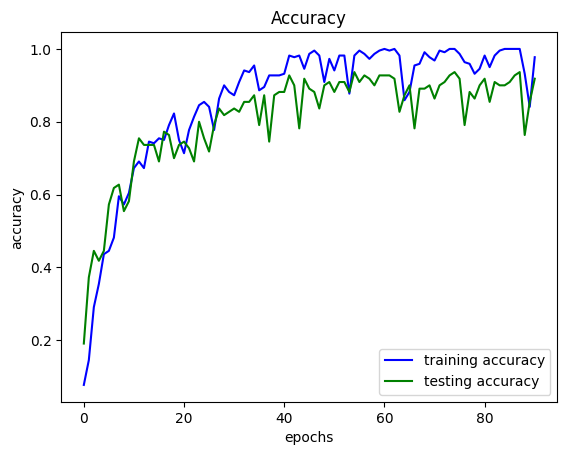

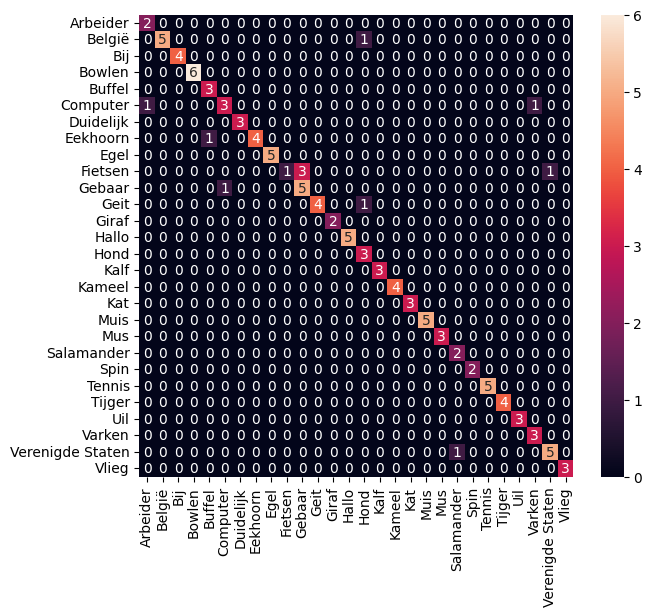

In [137]:
classifier.visualize_accuracy()
classifier.confusion_matrix()

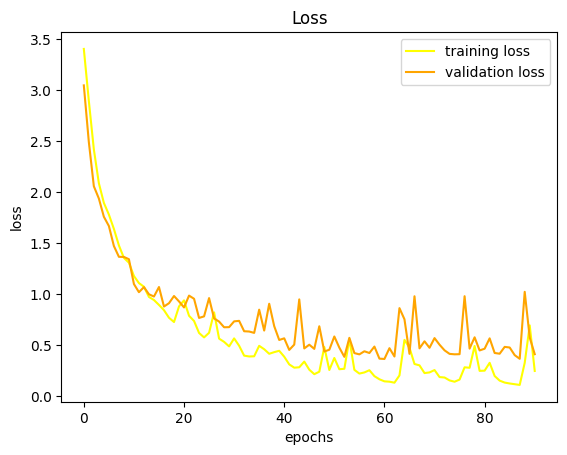

In [134]:
classifier.visualize_loss()

In [135]:
classifier.save_model("../model.h5")

# Old Implementation

In [136]:
raise Exception("dont run past here")

Exception: dont run past here

In [ ]:
classifier: GestureClassifier = GestureClassifier(gesture_dataset=gesture_dataset)
classifier.train(train_size=.5, type='standard')
classifier.summary()
classifier.visualize_accuracy()
classifier.confusion_matrix()

# Test predictions

In [ ]:
# from sl_ai.dataset import detect_hands_task, GestureData
#
# video_path = Path('../ai_data/vgt-all/duidelijk_11/duidelijk - 2023-01-04_16-41-21.mp4')
# gesture_data = GestureData(name="hello", left_hand=False, right_hand=True)
# video_name, (frame_width, frame_height), left_landmarks, right_landmarks = detect_hands_task(gesture_data, video_path)


In [ ]:
# from sl_ai.dataset import preprocess_landmarks
# from copy import deepcopy
# left_landmarks_copy = deepcopy(left_landmarks)
# right_landmarks_copy = deepcopy(right_landmarks)
# preprocess_landmarks(left_landmarks_copy, right_landmarks_copy, None, None)

In [ ]:
# from sl_ai.dataset import pre_process_point_history_center
#
# for i, landmarks in left_landmarks_copy.items():
#     left_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)
# for i, landmarks in right_landmarks_copy.items():
#     right_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)

In [ ]:
# result = classifier.predict(left_landmarks_copy, right_landmarks_copy)
# classes_x = np.argmax(result, axis=1)
# print(classes_x)
# prediction_percents = (result*100)
# frame = pd.DataFrame(prediction_percents.astype(np.int32))
# print(frame)

In [ ]:
# result

In [ ]:
# l = np.array(left_landmarks_copy[12], dtype='float32')
# r = np.array(right_landmarks_copy[12], dtype='float32')
#
# x_data = np.concatenate((l, r), axis=0)
# x_data = x_data.reshape((-1, x_data.shape[0]))
# results = classifier.model.predict(x_data, batch_size=1)
# classes_x = np.argmax(result, axis=1)
# print(classes_x)
# prediction_percents = (result*100)
# frame = pd.DataFrame(prediction_percents.astype(np.int32))
# print(frame)

In [ ]:
# classifier.train(train_size=.5)
# classifier.summary()

In [ ]:
# classifier.visualize_accuracy()

In [ ]:
# classifier.visualize_loss()

In [ ]:
# classifier.confusion_matrix()

# Test predictions

In [ ]:
# from sl_ai.dataset import detect_hands_task, GestureData
#
# video_path = Path('../ai_data/vgt-all/duidelijk_11/duidelijk - 2023-01-04_16-41-21.mp4')
# gesture_data = GestureData(name="hello", left_hand=False, right_hand=True)
# video_name, (frame_width, frame_height), left_landmarks, right_landmarks = detect_hands_task(gesture_data, video_path)


In [ ]:
# from sl_ai.dataset import preprocess_landmarks
# from copy import deepcopy
# left_landmarks_copy = deepcopy(left_landmarks)
# right_landmarks_copy = deepcopy(right_landmarks)
# preprocess_landmarks(left_landmarks_copy, right_landmarks_copy, None, None)

In [ ]:
# from sl_ai.dataset import pre_process_point_history_center
#
# for i, landmarks in left_landmarks_copy.items():
#     left_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)
# for i, landmarks in right_landmarks_copy.items():
#     right_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)

In [ ]:
# result = classifier.predict(left_landmarks_copy, right_landmarks_copy)
# classes_x = np.argmax(result, axis=1)
# print(classes_x)
# prediction_percents = (result*100)
# frame = pd.DataFrame(prediction_percents.astype(np.int32))
# print(frame)

In [ ]:
# result

In [ ]:
# l = np.array(left_landmarks_copy[12], dtype='float32')
# r = np.array(right_landmarks_copy[12], dtype='float32')
#
# x_data = np.concatenate((l, r), axis=0)
# x_data = x_data.reshape((-1, x_data.shape[0]))
# results = classifier.model.predict(x_data, batch_size=1)
# classes_x = np.argmax(result, axis=1)
# print(classes_x)
# prediction_percents = (result*100)
# frame = pd.DataFrame(prediction_percents.astype(np.int32))
# print(frame)